<a href="https://colab.research.google.com/github/Doradux/IABD-Course/blob/main/SAA/prediccion_precio_coches_manual_y_sklearn/prediccion_precio_coches_manual_y_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar csv

In [ ]:
import numpy as np
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
column_names = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration","num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base",	"length", "width", "height", "curb_weight", "engine_type", "num_cylinders","engine_size", "fuel_system", "bore", "stroke", "compression_ratio","horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]
# Cargar dataset con nombres de columnas
df = pd.read_csv(url, names=column_names, na_values="?")  # "?" indica valores faltantes
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# Correlacion de datos en base al precio

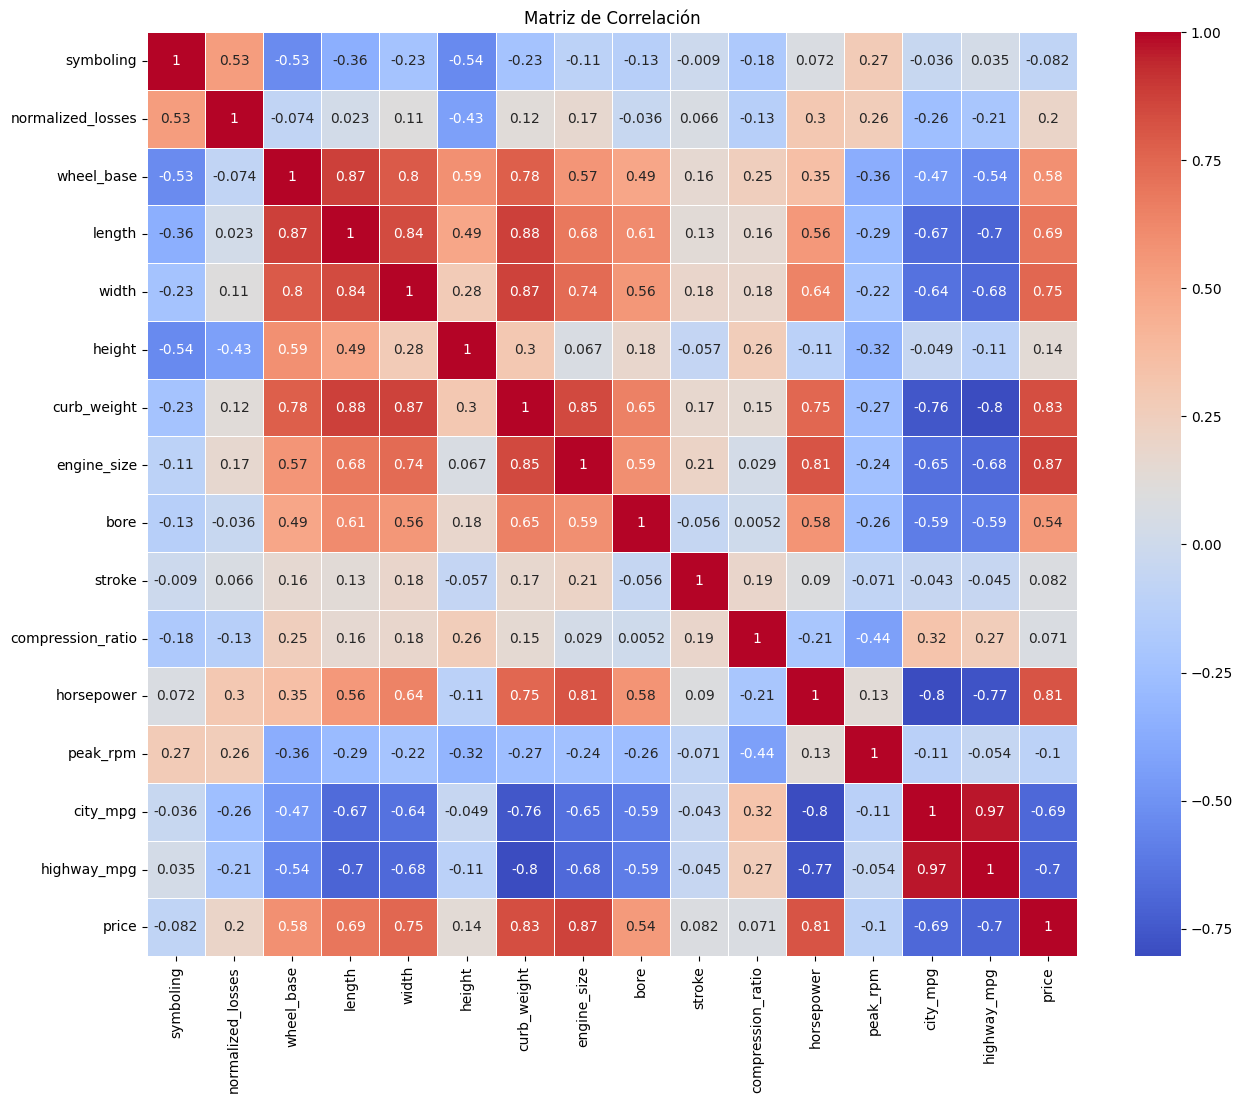

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df_numeric = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df_numeric.corr()

# Crear el mapa de calor de la matriz de correlación
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Mostrar el gráfico
plt.title("Matriz de Correlación")
plt.show()

## Eliminamos columnas que tienen poca correlacion con nuestra variable objetivo

In [ ]:
columns = ['symboling', 'normalized_losses', 'height', 'stroke', 'compression_ratio', 'peak_rpm', 'city_mpg', 'highway_mpg']
df = df.drop(columns=columns, axis=1)
print(df.columns)

Index(['make', 'fuel_type', 'aspiration', 'num_doors', 'body_style',
       'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width',
       'curb_weight', 'engine_type', 'num_cylinders', 'engine_size',
       'fuel_system', 'bore', 'horsepower', 'price'],
      dtype='object')


## Eliminamos valores nulos

In [ ]:
print(df.isnull().sum())
df = df.dropna()

make               0
fuel_type          0
aspiration         0
num_doors          2
body_style         0
drive_wheels       0
engine_location    0
wheel_base         0
length             0
width              0
curb_weight        0
engine_type        0
num_cylinders      0
engine_size        0
fuel_system        0
bore               4
horsepower         2
price              4
dtype: int64


## Hot encoding a columnas categoricas

In [ ]:
for column in df.columns:
  print(column)
  print(df[column].unique())
  print("=============================================================")

make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
fuel_type
['gas' 'diesel']
aspiration
['std' 'turbo']
num_doors
['two' 'four']
body_style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive_wheels
['rwd' 'fwd' '4wd']
engine_location
['front' 'rear']
wheel_base
[ 88.6  94.5  99.8  99.4 105.8 101.2 103.5 110.   88.4  93.7 103.3  95.9
  86.6  96.5  94.3  96.  113.  102.   93.1  98.8 104.9 106.7 115.6  96.6
 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2 107.9 114.2
 108.   89.5  99.1  93.3  97.   96.9  95.7  98.4 102.4 102.9 104.5  97.3
 104.3 109.1]
length
[168.8 171.2 176.6 177.3 192.7 176.8 189.  193.8 197.  141.1 155.9 158.8
 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7 172.6
 199.6 191.7 159.1 166.8 177.8 175.  190.9 187.5 202.6 180.3 208.1 199.2
 178.4 173.  172.4 165.3 170.2 165

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
columns = ['fuel_type', 'aspiration', 'num_doors', 'make', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_cylinders', 'fuel_system']

for column in columns:
  df[column] = label_encoder.fit_transform(df[column])
  print(column)
  print(df[column].unique())
  print('===================')

fuel_type
[1 0]
aspiration
[0 1]
num_doors
[1 0]
make
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
body_style
[0 2 3 4 1]
drive_wheels
[2 1 0]
engine_location
[0 1]
engine_type
[0 4 2 1 3]
num_cylinders
[2 3 1 4 5 0]
fuel_system
[4 1 3 0 6 2 5]


# Modelos

### Definir X e y

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = df.drop(columns=['price'])
y = df['price']

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'mse: {mse}')
print(f'r2: {r2}')
print(f'rmse: {rmse}')

mse: 17391720.133064017
r2: 0.8452348480099279
rmse: 4170.338131742319


In [ ]:
from sklearn.preprocessing import add_dummy_feature
X_b_train = add_dummy_feature(X_train)  # añade x0 = 1 a cada instancia
X_b_test = add_dummy_feature(X_test)  # añade x0 = 1 a cada instancia
theta_best = np.linalg.inv(X_b_train.T @ X_b_train) @ X_b_train.T @ y_train

theta_best

array([-3.20731644e+04, -1.08965814e+02, -7.62395390e+02, -6.55819132e+01,
       -1.39666545e+03, -7.11910722e+02,  1.48110509e+03,  1.45003836e+04,
        1.31562957e+02, -4.28708226e+01,  4.88205604e+02,  2.31537040e+00,
       -2.46927681e+02, -1.37819797e+03,  7.03918895e+01,  6.87943510e+01,
       -1.91112313e+03,  4.31419396e+01])

In [ ]:
y_pred_train = X_b_train @ theta_best
y_pred_test = X_b_test @ theta_best

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print(f'rmse: {rmse}')
print(f'r2: {r2}')

rmse: 4170.338131743108
r2: 0.8452348480098694
